In [1]:
import warnings
import tensorflow as tf

In [2]:
import tensorflow.examples.tutorials.mnist.input_data as input_data

In [4]:
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)
warnings.filterwarnings("ignore")

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


# 查看数据数量

In [5]:
print('训练集train数量：',mnist.train.num_examples,
     ',验证集 validation 数量：',mnist.validation.num_examples,
     ',测试集 test 数量：',mnist.test.num_examples)

训练集train数量： 55000 ,验证集 validation 数量： 5000 ,测试集 test 数量： 10000


# 查看数据格式

In [6]:
print('train images shape: ', mnist.train.images.shape
     ,'labels shape: ',mnist.train.labels.shape)

train images shape:  (55000, 784) labels shape:  (55000, 10)


# 查看图片

In [7]:
#讲一维的像素数据转化为二维的
image = mnist.train.images[0].reshape(28,28)
print(image)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [8]:
#可视化图片
import matplotlib.pyplot as plt

def plot_image(image):
    plt.imshow(image.reshape(28,28),cmap='binary')
    plt.show()

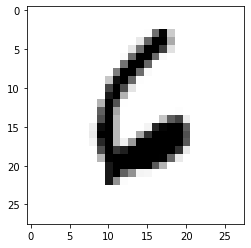

In [9]:
plot_image(mnist.train.images[3])

# 查看标题

In [10]:
print(mnist.train.labels[1])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


# 独热编码取值

In [11]:
import numpy as np
np.argmax(mnist.train.labels[3])

6

# 分类模型构建与训练 

In [12]:
#定义待输入数据的占位符
#由于是批量训练所以个数不固定，个数为None
#mnist 中的每张图片共有28*28=784个像素点
x = tf.placeholder(tf.float32, [None, 784], name="X")

# 0-9 一共10个数字=> 10 个类别
y = tf.placeholder(tf.float32, [None, 10], name="Y")

In [13]:
#定义全连接层函数

def fcn_layer(inputs,           # 输入数据
               input_dim,        # 输入神经元数量
               output_dim,       # 输出神经元数量
               activation=None):  # 激活函数
    # 以截断正态分布的随机数初始化W
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))

    # 以0初始化b
    b = tf.Variable(tf.zeros([output_dim]))
    
    # 前置计算
    XWb = tf.matmul(inputs, W) + b
    
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    
    return outputs

# 构建第一个隐藏层

In [17]:
h1 = fcn_layer(inputs=x,
               input_dim=784,
               output_dim=2000,
               activation=tf.nn.relu)

# 构建第二个隐藏层

In [18]:
h2 = fcn_layer(inputs=h1,
               input_dim=2000,
               output_dim=1000,
               activation=tf.nn.relu)

# 构建输出层

In [19]:
forword = fcn_layer(inputs=h2,
               input_dim=1000,
               output_dim=10,
               activation=None)

# 设置训练参数

In [20]:
#设置训练参数
train_epochs = 40 #训练轮数
batch_size = 50 #单次训练样本数（批次大小）
total_batch = int(mnist.train.num_examples/batch_size) # 一轮训练有多少批次
display_step = 1 #显示粒度
learning_rate = 0.01 #学习率

# 定义损失函数

In [21]:
#定义交叉熵损失函数

pred = tf.nn.softmax(forword)

loss_function = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits_v2(logits=forword,labels=y))

In [22]:
#梯度下降优化器

optimizer  = tf.train.AdamOptimizer(learning_rate).minimize(loss_function)

In [23]:
#检查预测类别

correct_prediction = tf.equal(tf.argmax(pred, 1),tf.argmax(y, 1))

In [24]:
#准确率，讲布尔值转化为浮点数，计算平均值

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [25]:
sess = tf.Session() #声明会话
init = tf.global_variables_initializer() #初始化变量
sess.run(init)

# 模型训练

In [26]:
#开始训练
for epoch in range(train_epochs ):
    for batch in range(total_batch):
        xs, ys = mnist.train.next_batch(batch_size)#读取批次数据
        sess.run(optimizer, feed_dict={x:xs,y:ys}) #执行批次训练
    #total_batch个批次训练完成后，使用验证数据计算误差与准确率；验证集没有分批
    loss,acc = sess.run([loss_function,accuracy],
                       feed_dict={x:mnist.validation.images,y:mnist.validation.labels})
    #打印训练过程中的详细信息
    if (epoch+1) % display_step == 0:
       print("Train Epoch:", epoch+1, "loss=", loss," Accuracy=",acc)
        
print("Train Finished!")

Train Epoch: 1 loss= 36.021046  Accuracy= 0.9486
Train Epoch: 2 loss= 23.558372  Accuracy= 0.9574
Train Epoch: 3 loss= 22.23655  Accuracy= 0.9584
Train Epoch: 4 loss= 19.009363  Accuracy= 0.9464
Train Epoch: 5 loss= 14.235599  Accuracy= 0.9594
Train Epoch: 6 loss= 10.014836  Accuracy= 0.9658
Train Epoch: 7 loss= 6.229563  Accuracy= 0.9396
Train Epoch: 8 loss= 1.5214907  Accuracy= 0.8942
Train Epoch: 9 loss= 1.1780831  Accuracy= 0.8596
Train Epoch: 10 loss= 1.1508831  Accuracy= 0.8542
Train Epoch: 11 loss= 1.2411664  Accuracy= 0.7952
Train Epoch: 12 loss= 0.8245883  Accuracy= 0.8684
Train Epoch: 13 loss= 0.6013873  Accuracy= 0.8368
Train Epoch: 14 loss= 0.6157908  Accuracy= 0.861
Train Epoch: 15 loss= 0.6207845  Accuracy= 0.8218
Train Epoch: 16 loss= 0.76317877  Accuracy= 0.837
Train Epoch: 17 loss= 0.8423877  Accuracy= 0.7942
Train Epoch: 18 loss= 0.8867818  Accuracy= 0.834
Train Epoch: 19 loss= 0.82123613  Accuracy= 0.8388
Train Epoch: 20 loss= 0.8497919  Accuracy= 0.81
Train Epoch: 2

# 完成训练后，在测试集上的评估模型的准确率

In [30]:
accu_test, tt = sess.run([accuracy,correct_prediction],
                     feed_dict={x:mnist.test.images, y: mnist.test.labels})
print("Test Accuracy：",accu_test)

Test Accuracy： 0.8005


In [28]:
print(len(tt))

40


labels: 2 prediction: 8


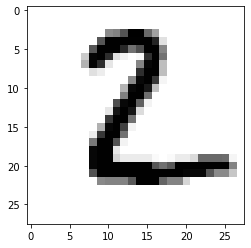

labels: 5 prediction: 8


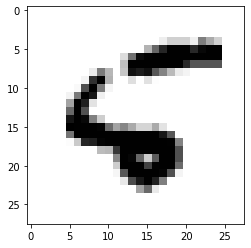

labels: 6 prediction: 8


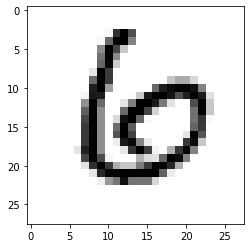

labels: 5 prediction: 8


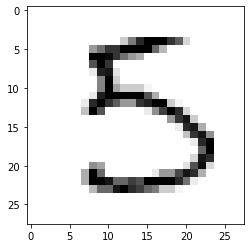

labels: 3 prediction: 8


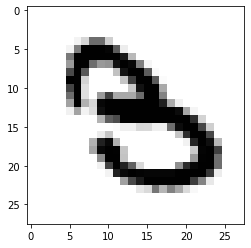

labels: 4 prediction: 8


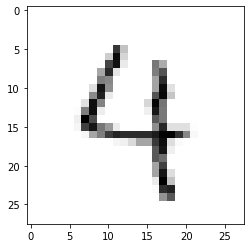

labels: 0 prediction: 8


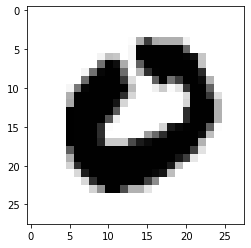

labels: 4 prediction: 8


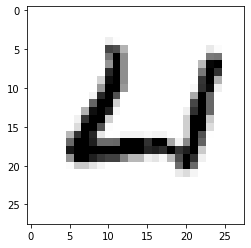

In [29]:
for i in range(len(tt)):
    if not(tt[i]):
        temp = sess.run(tf.argmax(pred,1),feed_dict={x:mnist.test.images[i].reshape(1,784)})
        print("labels:",sess.run(tf.argmax(mnist.test.labels[i])),"prediction:",temp[0])
        plot_image(mnist.test.images[i])